<a href="https://colab.research.google.com/github/xhesikam/WebtoonDataProject/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

path = kagglehub.dataset_download("iridazzle/webtoon-originals-datasets")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'webtoon-originals-datasets' dataset.
Path to dataset files: /kaggle/input/webtoon-originals-datasets


In [ ]:
import pandas as pd
df = pd.read_csv("/root/.cache/kagglehub/datasets/iridazzle/webtoon-originals-datasets/versions/31/webtoon_originals_en.csv")
df.head()

,title_id,title,genre,authors,weekdays,length,subscribers,rating,views,likes,status,synopsis
0,9053,The Knight of the Sightless Sky,ROMANCE,moni,TUESDAY,3,9799,0.0,35868,2117,ONGOING,"A consuming fire, a dead king, and a family in..."
1,9013,The Return of the Disaster-Class Hero,ACTION,"BGman(REDICE STUDIO),HEATS(REDICE STUDIO),SAN.G","TUESDAY,THURSDAY,SUNDAY",4,56025,0.0,355915,23724,ONGOING,"Twenty years. For twenty long years, the thirt..."
2,8998,Born to be the Grand Duchess,ROMANCE,"LICO,CHYAMI,LECHIMONA",SATURDAY,3,53792,0.0,215518,13838,ONGOING,Annette Fraise was supposed to die as the nove...
3,8997,Protect the Fake Saintess!,ROMANCE,Narion,WEDNESDAY,3,31793,0.0,133226,11547,ONGOING,"Dana, a Korean high school senior just days aw..."
4,8996,The Top Assassin in Another World,ACTION,"amamiya kazuki,akym",TUESDAY,3,35795,0.0,150316,7668,ONGOING,"Kai Shinjo, an ordinary high school student by..."


In [ ]:
df.replace(["NaN", "nan", "NULL", ""], np.nan, inplace=True)
df = df.dropna()

In [ ]:
df.describe(include = "all")

,title_id,title,genre,authors,weekdays,length,subscribers,rating,views,likes,status,synopsis
count,1775.000000,1775,1775,1775,1775,1775.000000,1.775000e+03,1775.0,1.775000e+03,1.775000e+03,1775,1775
unique,NaN,1775,17,1593,42,NaN,NaN,NaN,NaN,NaN,3,1774
top,NaN,DICE,ROMANCE,Various Artists,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,COMPLETED,There are attacks everyday and people suddenly...
freq,NaN,1,449,12,249,NaN,NaN,NaN,NaN,NaN,933,2
mean,4624.136901,NaN,NaN,NaN,NaN,59.605070,3.565381e+05,0.0,2.959386e+07,2.297950e+06,NaN,NaN
std,2544.017247,NaN,NaN,NaN,NaN,101.789325,5.841300e+05,0.0,9.243684e+07,5.857200e+06,NaN,NaN
min,64.000000,NaN,NaN,NaN,NaN,1.000000,6.363000e+03,0.0,2.121300e+04,1.495000e+03,NaN,NaN
25%,2591.500000,NaN,NaN,NaN,NaN,7.000000,8.051300e+04,0.0,1.981100e+06,1.886800e+05,NaN,NaN
50%,4678.000000,NaN,NaN,NaN,NaN,27.000000,1.683320e+05,0.0,5.912345e+06,5.486350e+05,NaN,NaN
75%,6853.500000,NaN,NaN,NaN,NaN,71.500000,3.773175e+05,0.0,1.989147e+07,1.877930e+06,NaN,NaN


In [ ]:
df['status'].value_counts()

,count
status,
COMPLETED,933
ONGOING,624
HIATUS,218


In [ ]:
df.describe() #no missing values

,title_id,length,subscribers,rating,views,likes
count,1775.000000,1775.000000,1.775000e+03,1775.0,1.775000e+03,1.775000e+03
mean,4624.136901,59.605070,3.565381e+05,0.0,2.959386e+07,2.297950e+06
std,2544.017247,101.789325,5.841300e+05,0.0,9.243684e+07,5.857200e+06
min,64.000000,1.000000,6.363000e+03,0.0,2.121300e+04,1.495000e+03
25%,2591.500000,7.000000,8.051300e+04,0.0,1.981100e+06,1.886800e+05
50%,4678.000000,27.000000,1.683320e+05,0.0,5.912345e+06,5.486350e+05
75%,6853.500000,71.500000,3.773175e+05,0.0,1.989147e+07,1.877930e+06
max,9053.000000,1410.000000,7.516896e+06,0.0,1.418216e+09,7.702175e+07


In [ ]:
df = df.drop_duplicates()
len(df) #no duplicates

1775

In [ ]:
df["weekdays"].unique()

array(['TUESDAY', 'TUESDAY,THURSDAY,SUNDAY', 'SATURDAY', 'WEDNESDAY',
       'SUNDAY', 'FRIDAY', 'MONDAY', 'THURSDAY',
       'MONDAY,WEDNESDAY,FRIDAY', 'TUESDAY,THURSDAY,SATURDAY',
       'WEDNESDAY,FRIDAY', 'WEDNESDAY,SATURDAY', 'THURSDAY,SUNDAY',
       'MONDAY,THURSDAY', 'WEDNESDAY,FRIDAY,SUNDAY', 'MONDAY,FRIDAY',
       'TUESDAY,FRIDAY', 'TUESDAY,SATURDAY',
       'MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY',
       'MONDAY,THURSDAY,SATURDAY', 'WEDNESDAY,SUNDAY',
       'MONDAY,TUESDAY,WEDNESDAY,THURSDAY,SUNDAY',
       'WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY', 'THURSDAY,SATURDAY',
       'MONDAY,SATURDAY', 'TUESDAY,THURSDAY', 'MONDAY,SUNDAY',
       'MONDAY,SATURDAY,SUNDAY', 'WEDNESDAY,THURSDAY',
       'TUESDAY,FRIDAY,SUNDAY', 'TUESDAY,SUNDAY', 'SATURDAY,SUNDAY',
       'THURSDAY,FRIDAY', 'TUESDAY,WEDNESDAY,THURSDAY,FRIDAY',
       'FRIDAY,SATURDAY', 'MONDAY,TUESDAY,FRIDAY', 'MONDAY,TUESDAY',
       'TUESDAY,WEDNESDAY', 'FRIDAY,SATURDAY,SUNDAY', 'MONDAY,WEDNESDA

In [ ]:
df.dtypes
df["weekdays"] = df["weekdays"].astype("string")
df.dtypes

,0
title_id,int64
title,object
genre,object
authors,object
weekdays,string[python]
length,int64
subscribers,int64
rating,float64
views,int64
likes,int64


In [ ]:
def day_fun(x):
     parts = x.split(",")
    #  print("parts:", parts)
    #  print("lenght:", len(parts))
     if len(parts) > 1:
        return "MULTIDAYS"
     else:
        return parts[0]

In [ ]:
df["days"] = df["weekdays"].apply(day_fun)
df["days"].unique()

array(['TUESDAY', 'MULTIDAYS', 'SATURDAY', 'WEDNESDAY', 'SUNDAY',
       'FRIDAY', 'MONDAY', 'THURSDAY'], dtype=object)

Choose 4 columns and do the following for each of these columns:
Plot the distribution of data in that column using an appropriate graph type.
Add a title and axes labels to the plot.
Add the plot to your webpage and write several sentences telling the reader what they should notice about the plot (ex. shape of distribution, outliers, skew, anything surprising, etc)


Text(0, 0.5, 'Count')

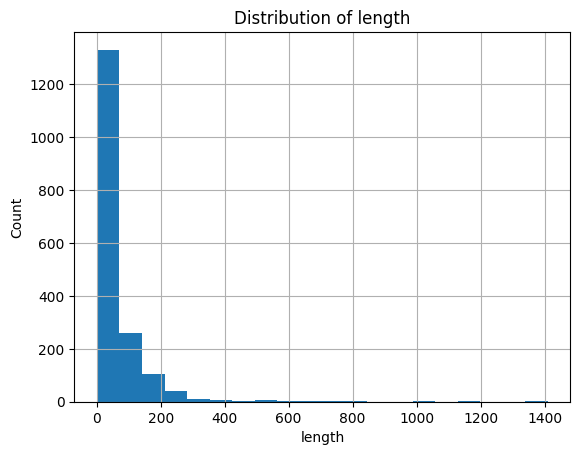

In [ ]:
df["length"].hist(bins=20)
plt.title('Distribution of length')
plt.xlabel('length')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

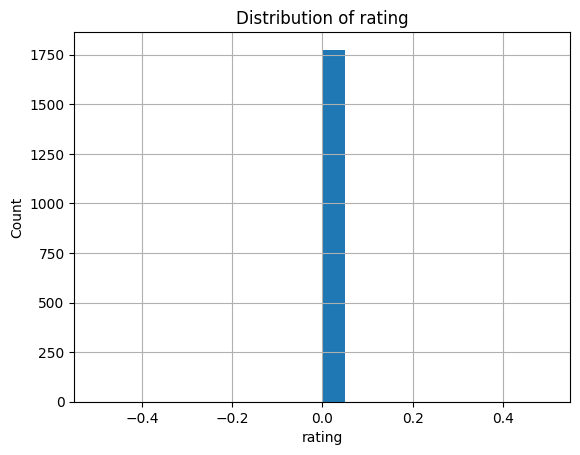

In [ ]:
df["rating"].hist(bins=20)
plt.title('Distribution of rating')
plt.xlabel('rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

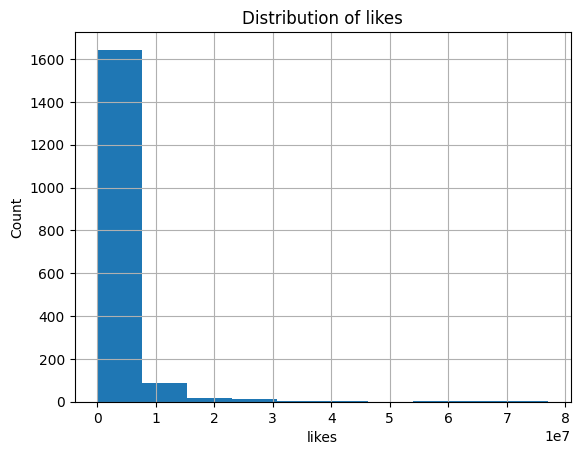

In [ ]:
df["likes"].hist()
plt.title('Distribution of likes')
plt.xlabel('likes')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

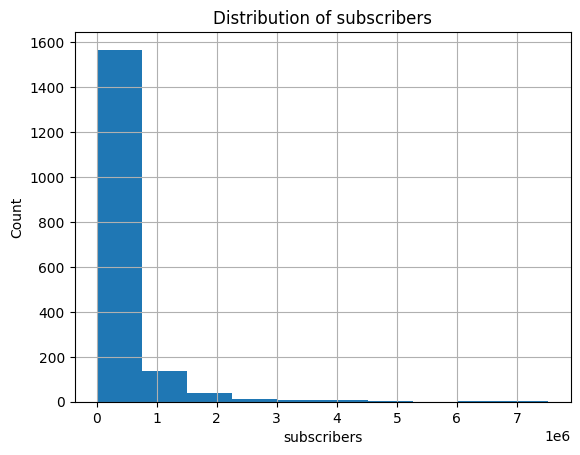

In [ ]:
df["subscribers"].hist()
plt.title('Distribution of subscribers')
plt.xlabel('subscribers')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

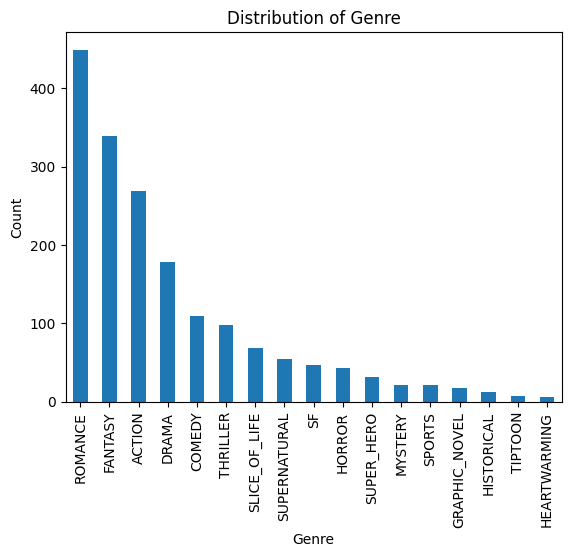

In [ ]:
genre_counts = df['genre'].value_counts()
genre_counts.plot(kind='bar')
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Count')

Create 2 plots by doing the following for each:
Choose two or more columns/variables, and create a plot visualizing their relationship.
Add a title and axes labels to the plot.
Add the plot to your webpage and write several sentences telling the reader what they should notice or conclude from this plot.


Text(0.5, 1.0, 'Subscribers vs views')

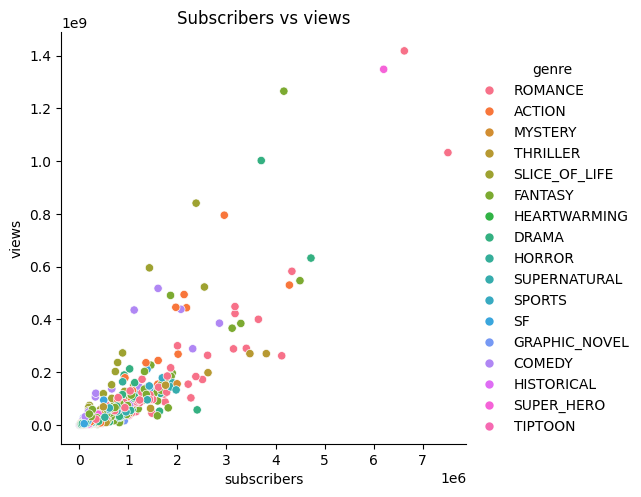

In [ ]:
import seaborn as sns
sns.relplot(x="subscribers", y = "views", hue="genre",data=df)
plt.title('Subscribers vs views')

Text(0.5, 1.0, 'Total Views by Genre')

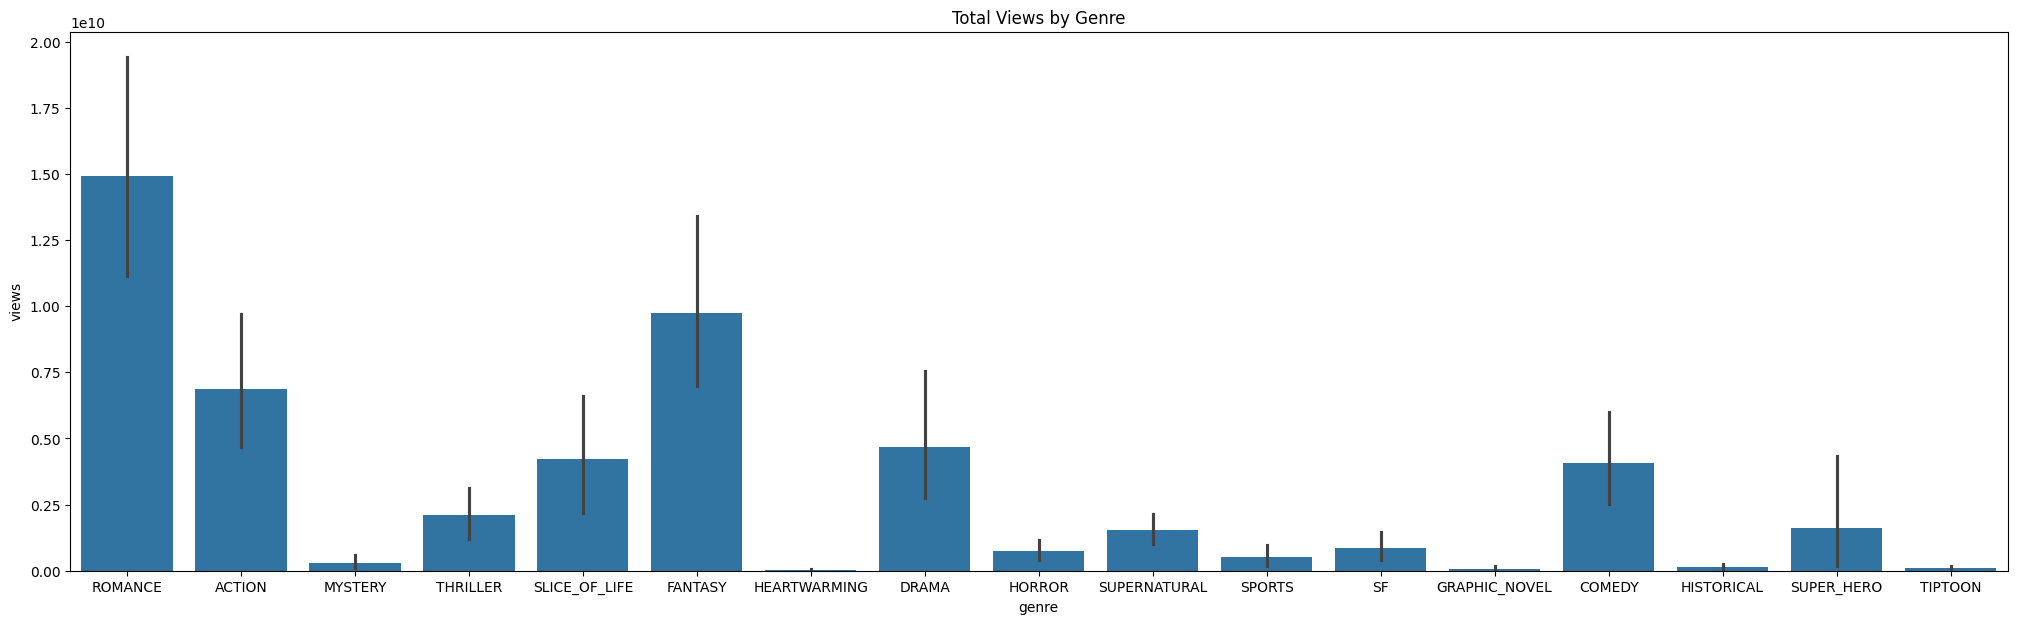

In [ ]:
plt.figure(figsize=(25,7))
sns.barplot(x="genre", y="views", data=df, estimator = sum)
plt.title("Total Views by Genre")



In [ ]:
import statsmodels.formula.api as smf
df2  = pd.get_dummies(df, columns = ["genre", "days", "status"],drop_first=True)
df2.head(2)

,title_id,title,authors,weekdays,length,subscribers,rating,views,likes,synopsis,...,genre_TIPTOON,days_MONDAY,days_MULTIDAYS,days_SATURDAY,days_SUNDAY,days_THURSDAY,days_TUESDAY,days_WEDNESDAY,status_HIATUS,status_ONGOING
0,9053,The Knight of the Sightless Sky,moni,TUESDAY,3,9799,0.0,35868,2117,"A consuming fire, a dead king, and a family in...",...,False,False,False,False,False,False,True,False,False,True
1,9013,The Return of the Disaster-Class Hero,"BGman(REDICE STUDIO),HEATS(REDICE STUDIO),SAN.G","TUESDAY,THURSDAY,SUNDAY",4,56025,0.0,355915,23724,"Twenty years. For twenty long years, the thirt...",...,False,False,True,False,False,False,False,False,False,True


In [ ]:
df2.columns

Index(['title_id', 'title', 'authors', 'weekdays', 'length', 'subscribers',
       'rating', 'views', 'likes', 'synopsis', 'genre_COMEDY', 'genre_DRAMA',
       'genre_FANTASY', 'genre_GRAPHIC_NOVEL', 'genre_HEARTWARMING',
       'genre_HISTORICAL', 'genre_HORROR', 'genre_MYSTERY', 'genre_ROMANCE',
       'genre_SF', 'genre_SLICE_OF_LIFE', 'genre_SPORTS', 'genre_SUPERNATURAL',
       'genre_SUPER_HERO', 'genre_THRILLER', 'genre_TIPTOON', 'days_MONDAY',
       'days_MULTIDAYS', 'days_SATURDAY', 'days_SUNDAY', 'days_THURSDAY',
       'days_TUESDAY', 'days_WEDNESDAY', 'status_HIATUS', 'status_ONGOING'],
      dtype='object')

In [ ]:
#linea
linear_model = smf.ols("subscribers ~ length + views + likes \
    + genre_COMEDY + genre_DRAMA + genre_FANTASY \
    + genre_GRAPHIC_NOVEL + genre_HEARTWARMING + genre_HISTORICAL \
    + genre_HORROR + genre_MYSTERY + genre_ROMANCE + genre_SF \
    + genre_SLICE_OF_LIFE + genre_SPORTS + genre_SUPERNATURAL \
    + genre_SUPER_HERO + genre_THRILLER + genre_TIPTOON \
    + days_MONDAY + days_MULTIDAYS + days_SATURDAY \
    + days_SUNDAY + days_THURSDAY + days_TUESDAY + days_WEDNESDAY \
    + status_HIATUS + status_ONGOING ",data=df2).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            subscribers   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     245.1
Date:                Sat, 20 Dec 2025   Prob (F-statistic):               0.00
Time:                        23:39:07   Log-Likelihood:                -24670.
No. Observations:                1775   AIC:                         4.940e+04
Df Residuals:                    1746   BIC:                         4.956e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1.553e+05   2.39e+04      6.500      0.000    1.08e+05    2.02e+05
genre_COMEDY[T.True]        -1.543e+04   3.26e+04     -0.473      0.636   -7.93e+04    4.85e+04
genre_DRAMA[T.True]          2.526e+04    2.6e+04      0.971      0.332   -2.57e+04    7.63e+04
genre_FANTASY[T.True]        6.611e+04   2.18e+04      3.029      0.002    2.33e+04    1.09e+05
genre_GRAPHIC_NOVEL[T.True] -2.993e+04   6.52e+04     -0.459      0.646   -1.58e+05    9.79e+04
genre_HEARTWARMING[T.True]  -1.771e+04    1.1e+05     -0.161      0.872   -2.33e+05    1.98e+05
genre_HISTORICAL[T.True]     3.226e+04   7.84e+04      0.412      0.681   -1.21e+05    1.86e+05
genre_HORROR[T.True]         4.806e+04    4.4e+04      1.091      0.275   -3.83e+04    1.34e+05
genre_MYSTERY[T.True]       -2.025e+04   5.91e+04     -0.342      0.732   -1.36e+05    9.57e+04
genre_ROMANCE[T.True]        1.079e+05   2.07e+04      5.211      0.000    6.73e+04    1.48e+05
genre_SF[T.True]             1.957e+04   4.26e+04      0.460      0.646    -6.4e+04    1.03e+05
genre_SLICE_OF_LIFE[T.True] -9.381e+04      4e+04     -2.343      0.019   -1.72e+05   -1.53e+04
genre_SPORTS[T.True]         2.408e+04   6.02e+04      0.400      0.689   -9.41e+04    1.42e+05
genre_SUPERNATURAL[T.True]   1.144e+05   3.97e+04      2.881      0.004    3.65e+04    1.92e+05
genre_SUPER_HERO[T.True]    -3.649e+04   5.05e+04     -0.723      0.470   -1.36e+05    6.26e+04
genre_THRILLER[T.True]       8.312e+04   3.19e+04      2.605      0.009    2.05e+04    1.46e+05
genre_TIPTOON[T.True]         3.13e+04   1.02e+05      0.307      0.759   -1.69e+05    2.31e+05
days_MONDAY[T.True]         -9176.2983   2.43e+04     -0.377      0.706   -5.69e+04    3.86e+04
days_MULTIDAYS[T.True]      -3.873e+04   3.43e+04     -1.128      0.260   -1.06e+05    2.86e+04
days_SATURDAY[T.True]        1.449e+04   2.48e+04      0.584      0.559   -3.42e+04    6.32e+04
days_SUNDAY[T.True]         -7388.7439   2.45e+04     -0.302      0.763   -5.54e+04    4.06e+04
days_THURSDAY[T.True]        1.692e+04   2.47e+04      0.685      0.493   -3.15e+04    6.54e+04
days_TUESDAY[T.True]         5144.9424    2.5e+04      0.206      0.837   -4.38e+04    5.41e+04
days_WEDNESDAY[T.True]       1.483e+04   2.43e+04      0.611      0.541   -3.28e+04    6.24e+04
status_HIATUS[T.True]         5.69e+04   2.06e+04      2.756      0.006    1.64e+04    9.74e+04
status_ONGOING[T.True]      -7738.2994   1.47e+04     -0.525      0.600   -3.67e+04    2.12e+04
length                       -925.2731     79.458    -11.645      0.000   -1081.116    -769.430
views                           0.0023      0.000      8.831      0.000       0.002       0.003
likes                           0.0593      0.004     14.178      0.000       0.051       0.068
===========

Text(0, 0.5, 'Residual')

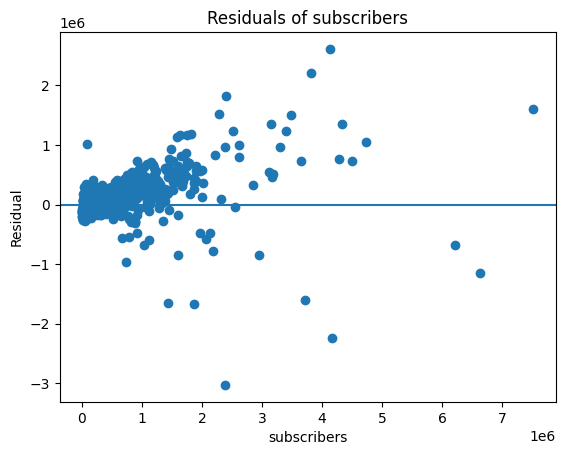

In [ ]:
plt.scatter(x = df2["subscribers"], y = linear_model.resid)
plt.axhline()
plt.title("Residuals of subscribers")
plt.xlabel("subscribers")
plt.ylabel("Residual")

In [ ]:
linear_model2 = smf.ols("subscribers ~ length + views + likes \
    + genre_FANTASY \
    + genre_ROMANCE \
    + genre_SLICE_OF_LIFE + genre_SUPERNATURAL \
    + genre_THRILLER  \
    + status_HIATUS",data=df2).fit()
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            subscribers   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     765.2
Date:                Sat, 20 Dec 2025   Prob (F-statistic):               0.00
Time:                        23:39:07   Log-Likelihood:                -24676.
No. Observations:                1775   AIC:                         4.937e+04
Df Residuals:                    1765   BIC:                         4.943e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     1.62e+05   1.06e+04     15.244      0.000    1.41e+05    1.83e+05
genre_FANTASY[T.True]        6.233e+04   1.73e+04      3.604      0.000    2.84e+04    9.63e+04
genre_ROMANCE[T.True]        1.032e+05   1.59e+04      6.482      0.000    7.19e+04    1.34e+05
genre_SLICE_OF_LIFE[T.True] -1.133e+05   3.45e+04     -3.288      0.001   -1.81e+05   -4.57e+04
genre_SUPERNATURAL[T.True]   1.121e+05    3.7e+04      3.031      0.002    3.96e+04    1.85e+05
genre_THRILLER[T.True]       7.787e+04   2.85e+04      2.732      0.006     2.2e+04    1.34e+05
status_HIATUS[T.True]        5.997e+04   1.93e+04      3.108      0.002    2.21e+04    9.78e+04
length                       -972.4090     74.099    -13.123      0.000   -1117.740    -827.078
views                           0.0022      0.000      8.874      0.000       0.002       0.003
likes                           0.0597      0.004     14.446      0.000       0.052       0.068
==============================================================================
Omnibus:                      647.659   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60341.519
Skew:                           0.747   Prob(JB):                         0.00
Kurtosis:                      31.525   Cond. No.                     5.96e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residual')

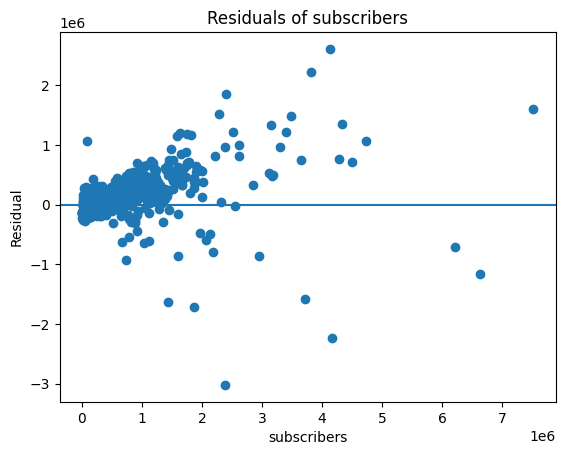

In [ ]:
plt.scatter(x = df2["subscribers"], y = linear_model2.resid)
plt.axhline()
plt.title("Residuals of subscribers")
plt.xlabel("subscribers")
plt.ylabel("Residual")

In [ ]:
linear_model3 = smf.ols("subscribers ~ length + views + likes",data=df2).fit()
linear_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            subscribers   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     2176.
Date:                Sat, 20 Dec 2025   Prob (F-statistic):               0.00
Time:                        23:39:08   Log-Likelihood:                -24716.
No. Observations:                1775   AIC:                         4.944e+04
Df Residuals:                    1771   BIC:                         4.946e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.166e+05   7526.430     28.775      0.000    2.02e+05    2.31e+05
length     -1105.8265     72.144    -15.328      0.000   -1247.323    -964.330
views          0.0022      0.000      8.609      0.000       0.002       0.003
likes          0.0610      0.004     14.494      0.000       0.053       0.069
==============================================================================
Omnibus:                      666.018   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58286.152
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                      31.025   Cond. No.                     1.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residual')

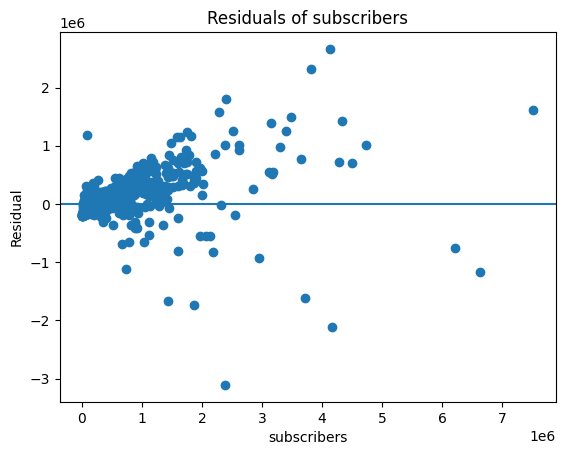

In [ ]:
plt.scatter(x = df2["subscribers"], y = linear_model3.resid)
plt.axhline()
plt.title("Residuals of subscribers")
plt.xlabel("subscribers")
plt.ylabel("Residual")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor #decision tree library
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

In [ ]:
x = df2[["length", "views", "likes","genre_FANTASY","genre_ROMANCE","genre_SLICE_OF_LIFE","genre_SUPERNATURAL","genre_THRILLER","status_HIATUS"]]
y = df2["subscribers"]
tree_model5 = DecisionTreeRegressor(max_depth = 5)
tree_model5.fit(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)

mse of test:  25198776356.371677
mse of training:  20778793461.071255


[Text(0.5225409836065574, 0.9166666666666666, 'x[1] <= 83136664.0\nsquared_error = 341015586809.759\nsamples = 1775\nvalue = 356538.065'),
 Text(0.26229508196721313, 0.75, 'x[1] <= 14314510.5\nsquared_error = 56806399180.832\nsamples = 1636\nvalue = 232074.517'),
 Text(0.39241803278688525, 0.8333333333333333, 'True  '),
 Text(0.13114754098360656, 0.5833333333333334, 'x[1] <= 4242784.5\nsquared_error = 8602832431.378\nsamples = 1219\nvalue = 129379.963'),
 Text(0.06557377049180328, 0.4166666666666667, 'x[1] <= 1909367.0\nsquared_error = 2107934508.614\nsamples = 745\nvalue = 78595.717'),
 Text(0.03278688524590164, 0.25, 'x[1] <= 780548.5\nsquared_error = 752730703.837\nsamples = 424\nvalue = 52364.63'),
 Text(0.01639344262295082, 0.08333333333333333, 'squared_error = 234199615.642\nsamples = 200\nvalue = 33769.365'),
 Text(0.04918032786885246, 0.08333333333333333, 'squared_error = 631312507.569\nsamples = 224\nvalue = 68967.545'),
 Text(0.09836065573770492, 0.25, 'x[1] <= 3052073.0\nsqu

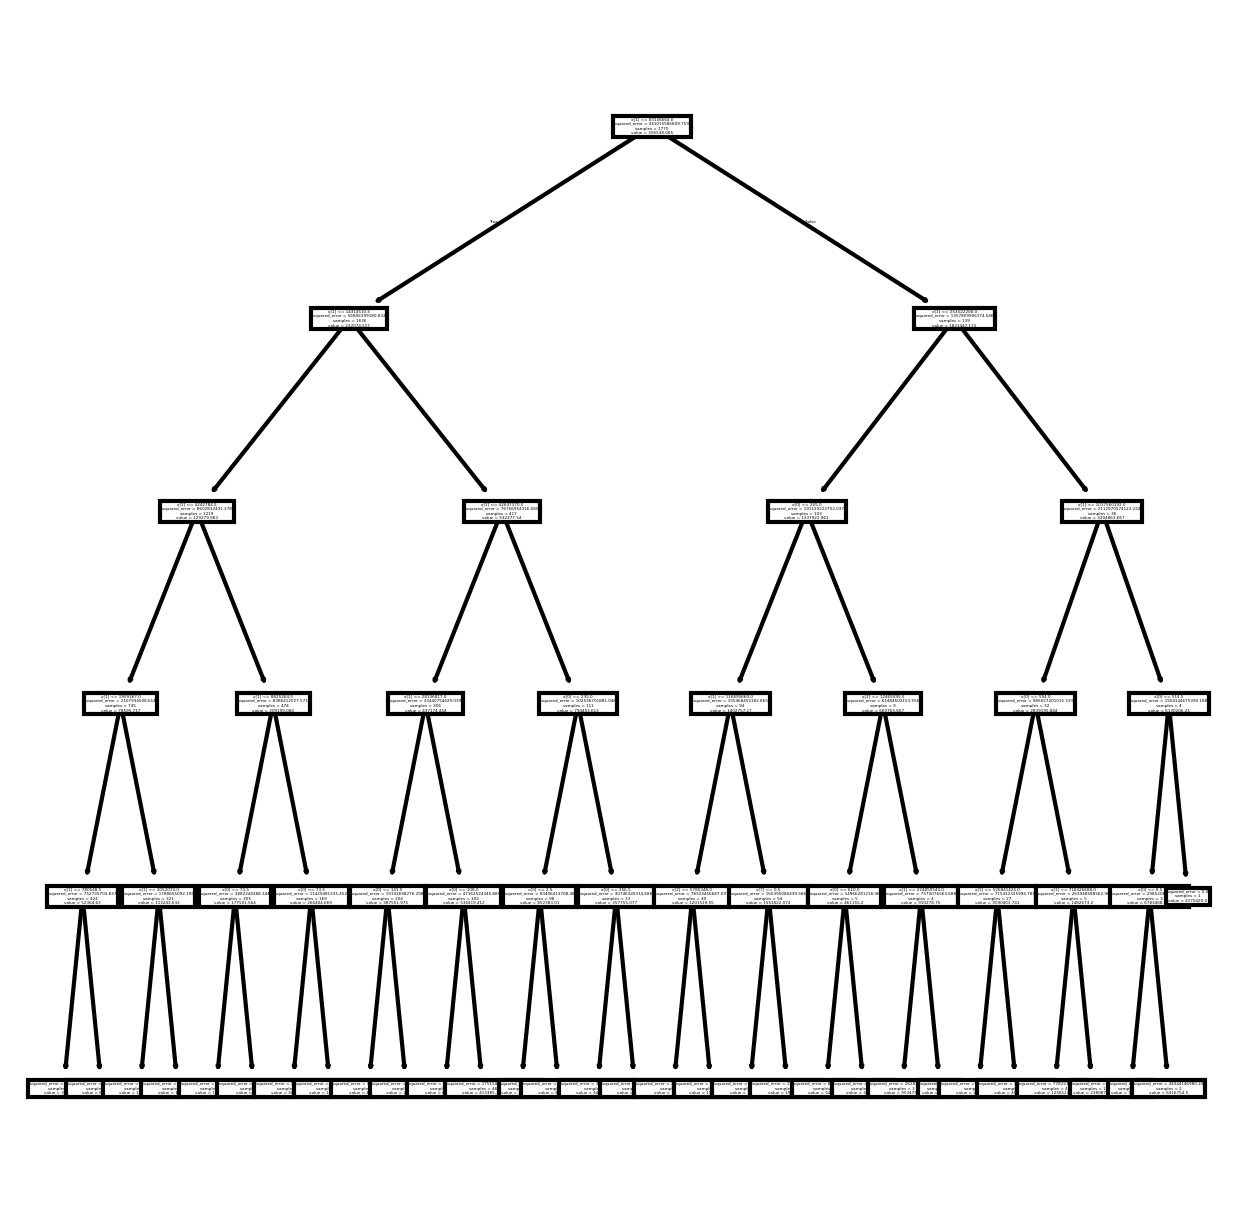

In [ ]:
p5test = tree_model5.predict(x_test)
print("mse of test: ", mean_squared_error(p5test, y_test))
p5train = tree_model5.predict(x_train)
print("mse of training: ",mean_squared_error(p5train, y_train))
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
plot_tree(tree_model5)

mse of test:  39353595974.71842
mse of training:  46418657143.42625


[Text(0.5, 0.875, 'x[1] <= 83136664.0\nsquared_error = 341015586809.759\nsamples = 1775\nvalue = 356538.065'),
 Text(0.25, 0.625, 'x[1] <= 14314510.5\nsquared_error = 56806399180.832\nsamples = 1636\nvalue = 232074.517'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 4242784.5\nsquared_error = 8602832431.378\nsamples = 1219\nvalue = 129379.963'),
 Text(0.0625, 0.125, 'squared_error = 2107934508.614\nsamples = 745\nvalue = 78595.717'),
 Text(0.1875, 0.125, 'squared_error = 8386412027.571\nsamples = 474\nvalue = 209199.084'),
 Text(0.375, 0.375, 'x[1] <= 42647370.0\nsquared_error = 76766954316.685\nsamples = 417\nvalue = 532277.54'),
 Text(0.3125, 0.125, 'squared_error = 33440754429.039\nsamples = 306\nvalue = 437174.454'),
 Text(0.4375, 0.125, 'squared_error = 102536701881.048\nsamples = 111\nvalue = 794453.613'),
 Text(0.75, 0.625, 'x[1] <= 253522200.0\nsquared_error = 1357809906174.546\nsamples = 139\nvalue = 1821447.173'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.37

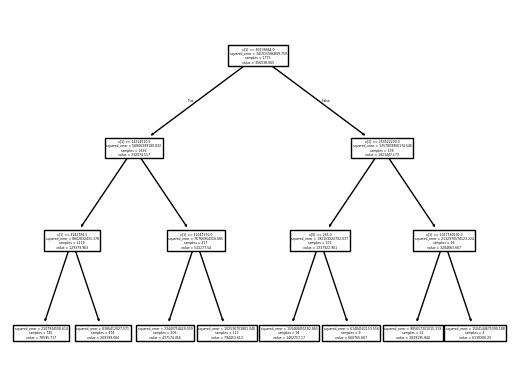

In [ ]:
tree_model3 = DecisionTreeRegressor(max_depth = 3)
tree_model3.fit(x, y)
p3test = tree_model3.predict(x_test)
print("mse of test: ", mean_squared_error(p3test, y_test))
p3train = tree_model3.predict(x_train)
print("mse of training: ",mean_squared_error(p3train, y_train))
plot_tree(tree_model3)

mse of test:  3782351395.1927967
mse of training:  2950056348.9498982


[Text(0.7098639279801324, 0.9545454545454546, 'x[1] <= 83136664.0\nsquared_error = 341015586809.759\nsamples = 1775\nvalue = 356538.065'),
 Text(0.4789036630794702, 0.8636363636363636, 'x[1] <= 14314510.5\nsquared_error = 56806399180.832\nsamples = 1636\nvalue = 232074.517'),
 Text(0.5943837955298013, 0.9090909090909092, 'True  '),
 Text(0.27923220198675497, 0.7727272727272727, 'x[1] <= 4242784.5\nsquared_error = 8602832431.378\nsamples = 1219\nvalue = 129379.963'),
 Text(0.1677876655629139, 0.6818181818181818, 'x[1] <= 1909367.0\nsquared_error = 2107934508.614\nsamples = 745\nvalue = 78595.717'),
 Text(0.09312913907284769, 0.5909090909090909, 'x[1] <= 780548.5\nsquared_error = 752730703.837\nsamples = 424\nvalue = 52364.63'),
 Text(0.047392384105960264, 0.5, 'x[1] <= 264272.5\nsquared_error = 234199615.642\nsamples = 200\nvalue = 33769.365'),
 Text(0.026076158940397352, 0.4090909090909091, 'x[1] <= 132668.0\nsquared_error = 97957839.309\nsamples = 69\nvalue = 21972.768'),
 Text(0.0132

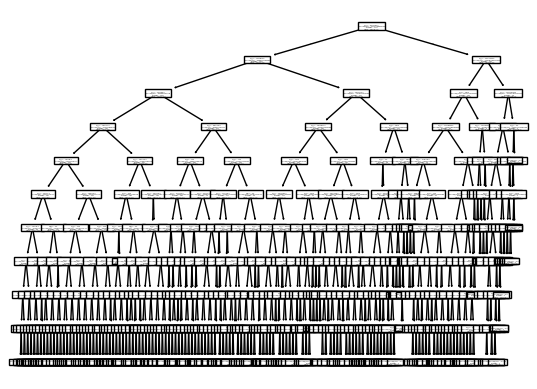

In [ ]:
tree_model10 = DecisionTreeRegressor(max_depth = 10)
tree_model10.fit(x, y)
p10test = tree_model10.predict(x_test)
print("mse of test: ", mean_squared_error(p10test, y_test))
p10train = tree_model10.predict(x_train)
print("mse of training: ",mean_squared_error(p10train, y_train))
plot_tree(tree_model10)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
df2 = df2.dropna()
x2 = df2[["length", "views", "likes","genre_FANTASY","genre_ROMANCE","genre_SLICE_OF_LIFE","genre_SUPERNATURAL","genre_THRILLER","status_HIATUS"]]
y2= df2["subscribers"]
x.head(1)

,length,views,likes,genre_FANTASY,genre_ROMANCE,genre_SLICE_OF_LIFE,genre_SUPERNATURAL,genre_THRILLER,status_HIATUS
0,3,35868,2117,False,True,False,False,False,False


mse of test:  67771654425.601494
mse of training:  47673944249.734276


Text(0, 0.5, 'True Subscribers - Predicted Subscribers')

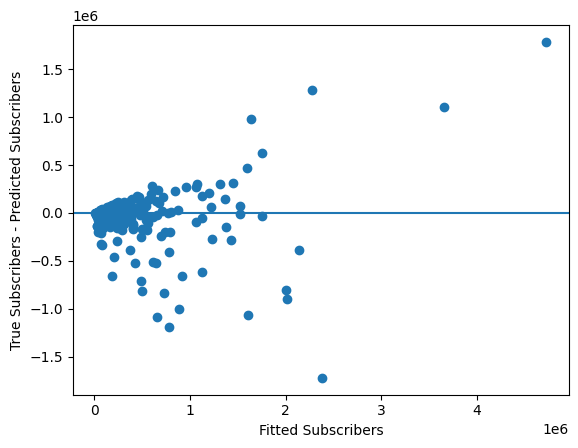

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state = 42)
knn7 = KNeighborsRegressor(n_neighbors = 7)
knn7.fit(x2_train, y2_train)
y_test_pred7 = knn7.predict(x2_test)
print("mse of test: ", mean_squared_error(y_test_pred7, y2_test))
y_train_pred7 = knn7.predict(x2_train)
print("mse of training: ",mean_squared_error(y_train_pred7, y2_train))
plt.scatter(y2_test, y2_test - y_test_pred7)
plt.axhline()
plt.xlabel("Fitted Subscribers")
plt.ylabel("True Subscribers - Predicted Subscribers")


mse of test:  61050140700.84133
mse of training:  47999175140.74855


Text(0, 0.5, 'True Subscribers - Predicted Subscribers')

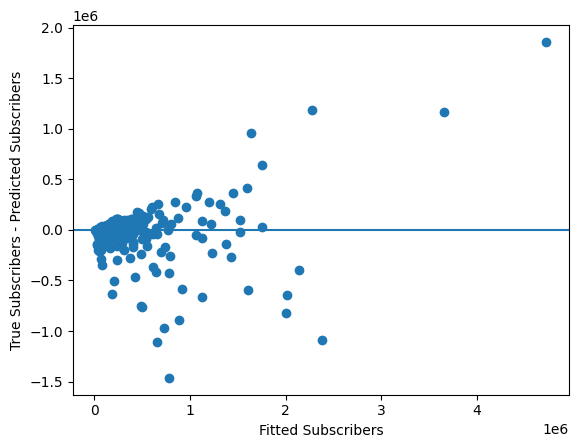

In [ ]:
knn10 = KNeighborsRegressor(n_neighbors = 10)
knn10.fit(x2_train, y2_train)
y_test_pred10 = knn10.predict(x2_test)
print("mse of test: ", mean_squared_error(y_test_pred10, y2_test))
y_train_pred10 = knn10.predict(x2_train)
print("mse of training: ",mean_squared_error(y_train_pred10, y2_train))
plt.scatter(y2_test, y2_test - y_test_pred10)
plt.axhline()
plt.xlabel("Fitted Subscribers")
plt.ylabel("True Subscribers - Predicted Subscribers")

mse of test:  61819484346.8489
mse of training:  41510484599.21825


Text(0, 0.5, 'True Subscribers - Predicted Subscribers')

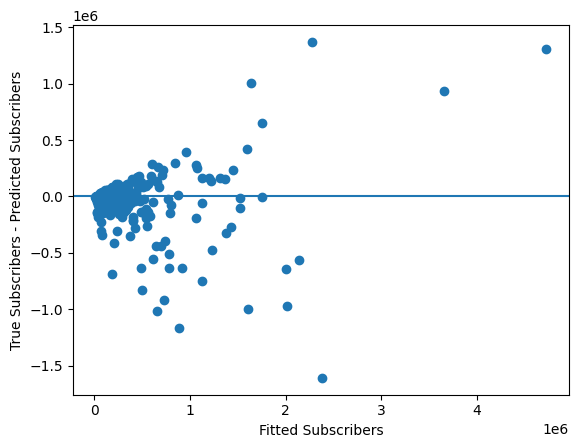

In [ ]:
knn5 = KNeighborsRegressor(n_neighbors = 5)
knn5.fit(x2_train, y2_train)
y_test_pred5 = knn5.predict(x2_test)
print("mse of test: ", mean_squared_error(y_test_pred5, y2_test))
y_train_pred5 = knn5.predict(x2_train)
print("mse of training: ",mean_squared_error(y_train_pred5, y2_train))
plt.scatter(y2_test, y2_test - y_test_pred5)
plt.axhline()
plt.xlabel("Fitted Subscribers")
plt.ylabel("True Subscribers - Predicted Subscribers")

In [ ]:
#New one

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = df2[['subscribers', 'views', 'likes']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0, 0.5, 'Inertia')

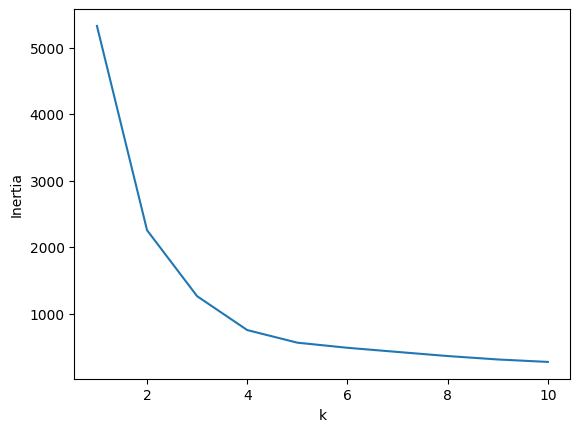

In [137]:
inertia_list = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(1,11), inertia_list)
plt.xlabel("k")
plt.ylabel("Inertia")

In [143]:
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(X_scaled)
clusters = kmeans3.predict(X_scaled)
df2['cluster'] = clusters

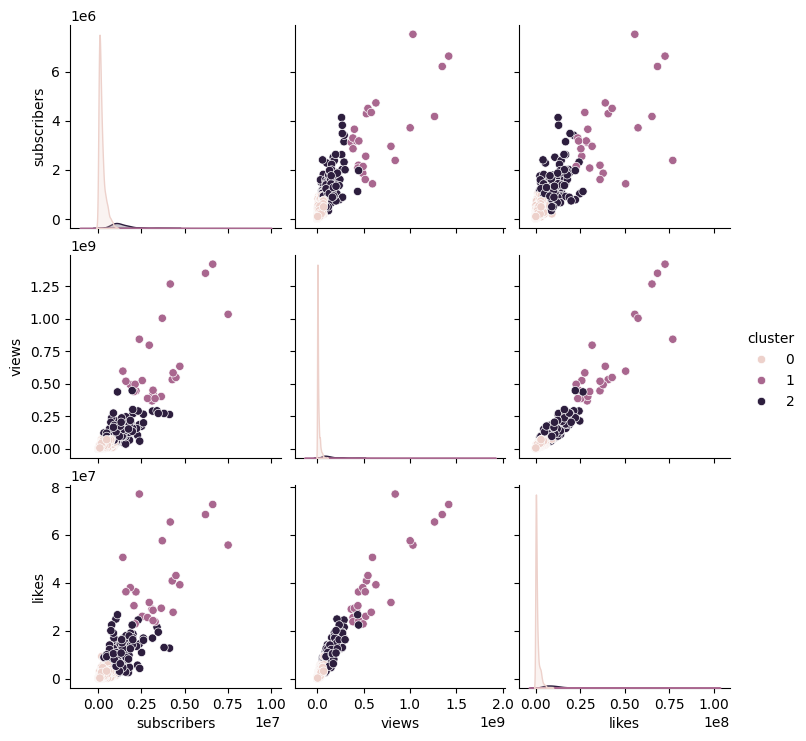

In [147]:
sns.pairplot(data = df2[['subscribers', 'views', 'likes', 'cluster']], hue="cluster")
#plotted these spficic columns because it would have taken too long to plot the whole dataframe

Two of our choice (can be ones used before with different variables)

In [ ]:
linear_model4 = smf.ols("views ~ length + subscribers + likes \
    + genre_FANTASY \
    + genre_ROMANCE \
    + genre_SLICE_OF_LIFE + genre_SUPERNATURAL \
    + genre_THRILLER  \
    + status_HIATUS",data=df2).fit()

linear_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     2655.
Date:                Sun, 21 Dec 2025   Prob (F-statistic):               0.00
Time:                        00:00:13   Log-Likelihood:                -32700.
No. Observations:                1775   AIC:                         6.542e+04
Df Residuals:                    1765   BIC:                         6.547e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -4.805e+06   1.03e+06     -4.654      0.000   -6.83e+06   -2.78e+06
genre_FANTASY[T.True]       -3.875e+06   1.59e+06     -2.434      0.015      -7e+06   -7.52e+05
genre_ROMANCE[T.True]       -2.827e+06   1.48e+06     -1.913      0.056   -5.73e+06     7.2e+04
genre_SLICE_OF_LIFE[T.True]  -4.75e+06   3.17e+06     -1.497      0.135    -1.1e+07    1.47e+06
genre_SUPERNATURAL[T.True]   -8.73e+06    3.4e+06     -2.567      0.010   -1.54e+07   -2.06e+06
genre_THRILLER[T.True]      -2.423e+06   2.62e+06     -0.924      0.356   -7.57e+06    2.72e+06
status_HIATUS[T.True]       -3.051e+06   1.78e+06     -1.717      0.086   -6.53e+06    4.33e+05
length                      -2.758e+04   7102.917     -3.883      0.000   -4.15e+04   -1.37e+04
subscribers                    18.9897      2.140      8.874      0.000      14.793      23.187
likes                          13.7910      0.231     59.600      0.000      13.337      14.245
==============================================================================
Omnibus:                     1647.037   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           318073.869
Skew:                           3.736   Prob(JB):                         0.00
Kurtosis:                      68.153   Cond. No.                     3.87e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residual')

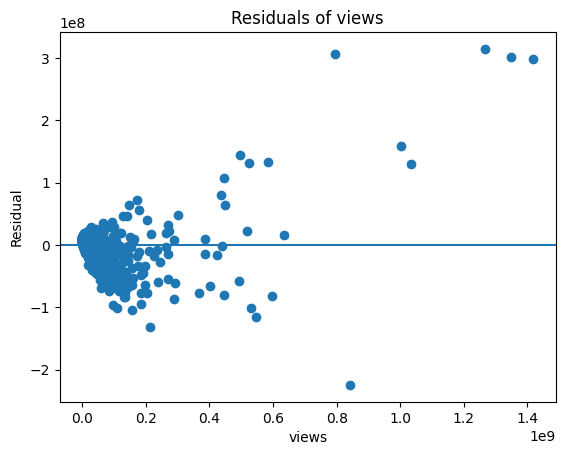

In [ ]:
plt.scatter(x = df2["views"], y = linear_model4.resid)
plt.axhline()
plt.title("Residuals of views")
plt.xlabel("views")
plt.ylabel("Residual")

In [ ]:
linear_model5 = smf.ols("likes ~ length + subscribers + views \
    + genre_FANTASY \
    + genre_ROMANCE \
    + genre_SLICE_OF_LIFE + genre_SUPERNATURAL \
    + genre_THRILLER  \
    + status_HIATUS",data=df2).fit()

linear_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     3063.
Date:                Sun, 21 Dec 2025   Prob (F-statistic):               0.00
Time:                        00:01:48   Log-Likelihood:                -27684.
No. Observations:                1775   AIC:                         5.539e+04
Df Residuals:                    1765   BIC:                         5.544e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -1.702e+05   6.14e+04     -2.771      0.006   -2.91e+05   -4.98e+04
genre_FANTASY[T.True]        6.084e+04   9.45e+04      0.644      0.520   -1.25e+05    2.46e+05
genre_ROMANCE[T.True]       -4.119e+04   8.77e+04     -0.470      0.639   -2.13e+05    1.31e+05
genre_SLICE_OF_LIFE[T.True]   5.37e+05   1.88e+05      2.860      0.004    1.69e+05    9.05e+05
genre_SUPERNATURAL[T.True]   1.915e+05   2.02e+05      0.949      0.343   -2.04e+05    5.87e+05
genre_THRILLER[T.True]      -3.401e+04   1.56e+05     -0.219      0.827   -3.39e+05    2.71e+05
status_HIATUS[T.True]       -1.695e+04   1.05e+05     -0.161      0.872   -2.24e+05     1.9e+05
length                       6362.1549    394.706     16.119      0.000    5588.014    7136.296
subscribers                     1.7708      0.123     14.446      0.000       1.530       2.011
views                           0.0484      0.001     59.600      0.000       0.047       0.050
==============================================================================
Omnibus:                     1455.390   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273019.660
Skew:                           3.006   Prob(JB):                         0.00
Kurtosis:                      63.460   Cond. No.                     5.95e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residual')

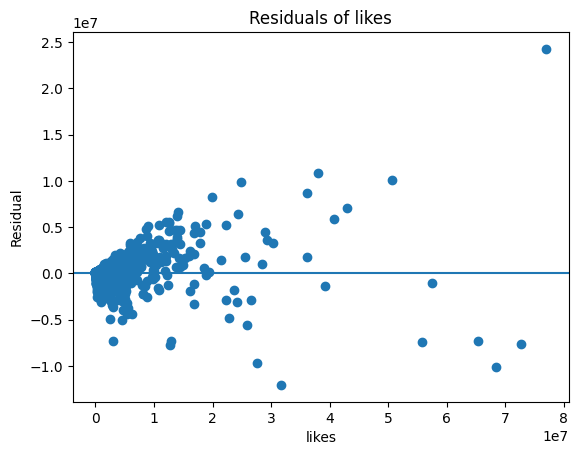

In [ ]:
plt.scatter(x = df2["likes"], y = linear_model5.resid)
plt.axhline()
plt.title("Residuals of likes")
plt.xlabel("likes")
plt.ylabel("Residual")